In [1]:
# %matplotlib notebook
%matplotlib inline

In [2]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [3]:
#Reading files
mouse_metadata=pd.read_csv("data/Mouse_metadata.csv")
study_result=pd.read_csv("data/Study_results.csv")
#mouse_metadata
# study_result

In [4]:
#Merging data
merged_df=pd.merge(study_result,mouse_metadata,how="left",on="Mouse ID")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
#Checking Number of Mice
Mice_count=merged_df["Mouse ID"].nunique()
Mice_count

249

In [6]:
# duplicate_df=merged_df[merged_df.duplicated()]
# duplicate_df.head()

In [7]:
dropped_df=merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]),'Mouse ID'].unique()
# dropped_df.unique()
dropped_df

array(['g989'], dtype=object)

In [8]:
# len(list(dropped_df["Mouse ID"].values.tolist()))

In [9]:
# cleaned_df=merged_df.drop_duplicates(subset=["Mouse ID"])
# cleaned_df

In [10]:
cleaned_df = merged_df[merged_df['Mouse ID'].isin(dropped_df)==False]
cleaned_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
len("Mouse ID")

8

In [12]:
grouped_df=cleaned_df.groupby("Drug Regimen")

In [13]:
math_value=grouped_df["Tumor Volume (mm3)"].aggregate(['mean','median','var','std','sem'])
math_value

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
timepoint_count=grouped_df["Timepoint"].count()
timepoint_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [15]:
timepoint_df=timepoint_count.to_frame()
timepoint_df=timepoint_df.sort_values('Timepoint',ascending=False)
timepoint_df

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


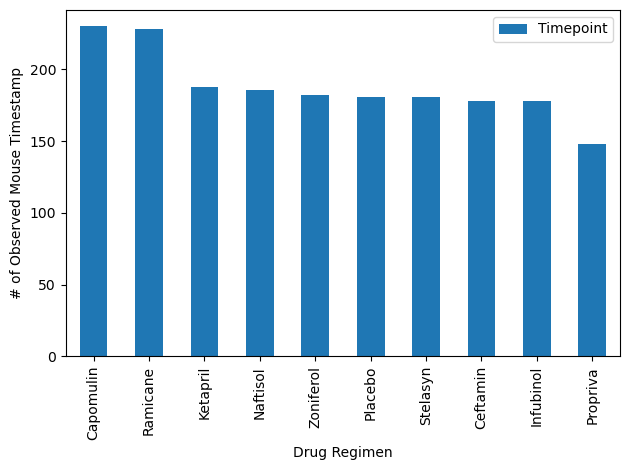

In [16]:
#Piechart using Pandas
timepoint_df.plot.bar(xlabel="Drug Regimen",ylabel="# of Observed Mouse Timestamp")
plt.xticks(rotation=90)
plt.tight_layout()

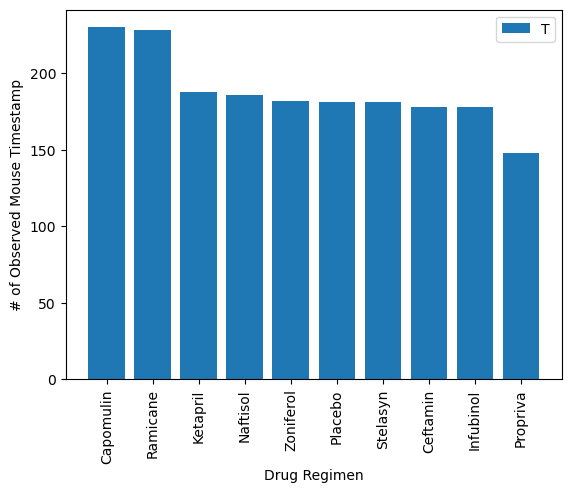

In [17]:
#Barchart using pyplot
x_axis=np.arange(len(timepoint_df))
tick_locations=[value for value in x_axis]
plt.bar(x_axis,timepoint_df["Timepoint"])
plt.xticks(tick_locations,timepoint_df.index,rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timestamp")
plt.legend("Timepoint")
plt.show()

In [18]:
gender=cleaned_df.groupby("Sex")["Mouse ID"].count()
gender_df=gender.to_frame()
gender_df

,Mouse ID
Sex,
Female,922
Male,958


array([<Axes: ylabel='Mouse ID'>], dtype=object)

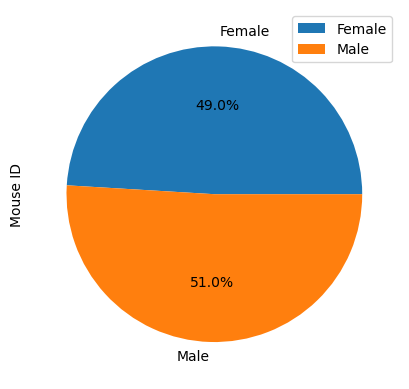

In [19]:
#Piechart using pandas
gender_df.plot.pie(subplots=True,autopct='%1.1f%%')

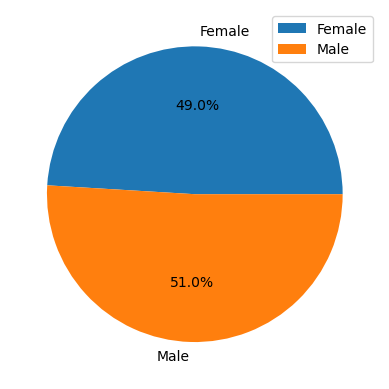

In [20]:
#Piechart using Pyplot
size=[922,958]
mylables=["Female","Male"]
plt.pie(size,labels=mylables,autopct="%1.1f%%")
plt.legend()
plt.show()

In [21]:
tumor_volume=cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()
# count=tumor_volume["Timepoint"].max()
# count
tumor_volume


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [22]:
tumor_volume=tumor_volume.reset_index()

In [23]:
# cleaned_df["Max Count of volume"]=count
# cleaned_dfMo
data=tumor_volume.merge(cleaned_df,on=["Mouse ID","Timepoint"],how="left")
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [24]:
treatment=["Capomulin","Ramicane","Infubinol","Ceftamin"]
tumor_v=[]


In [25]:
# for x in treatment:
#     t_point=cleaned_df.loc[cleaned_df["Drug Regimen"]==x,"Tumor Volume (mm3)"]
#     tumor_v.append(t_point)
#     quartile=t_point.quantile([0.25,0.50,0.75])
#     Q1=quartile[0.25]
# #     print(f"First Quartile: {Q1}")
#     Q3=quartile[0.75]
# #     print(f"Third Quartile: {Q3}")
#     IQR=Q3-Q1
#     lower_bound=Q1-(1.5*IQR)
#     upper_bound=Q3+(1.5*IQR)
# #     print(f"lower Bound is :{lower_bound}")
# #     print(f"Upper bound is:{upper_bound}")
#     outliers = t_point[(t_point < lower_bound) | (t_point > upper_bound)]
#     print(f"Outliers are :{outliers}")
    

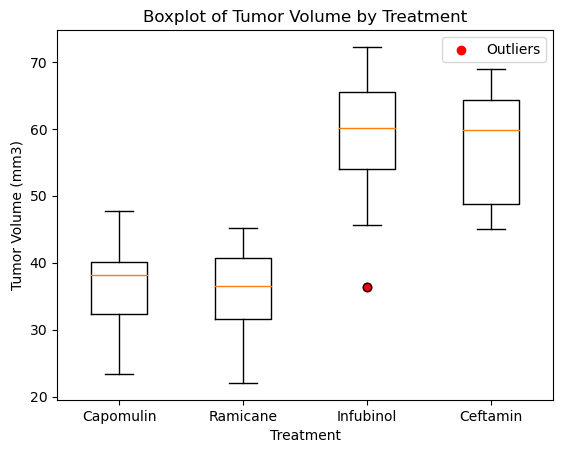

In [26]:
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_v = []

for x in treatment:
    t_point = data.loc[data["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    tumor_v.append(t_point)

# Create a figure and axes for the boxplot
fig, ax = plt.subplots()

# Create the boxplot
ax.boxplot(tumor_v)
ax.set_xlabel("Treatment")
ax.set_ylabel("Tumor Volume (mm3)")

# Set the tick labels for the x-axis
ax.set_xticklabels(treatment)

# Set the title of the plot
ax.set_title("Boxplot of Tumor Volume by Treatment")

# Find outliers and mark them with red color
for i, t_point in enumerate(tumor_v):
    quartiles = t_point.quantile([0.25, 0.50, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = t_point[(t_point < lower_bound) | (t_point > upper_bound)]
    if len(outliers) > 0:
        ax.scatter([i+1]*len(outliers), outliers, color='red', label="Outliers")

# Display the legend
ax.legend()

# Display the plot
plt.show()

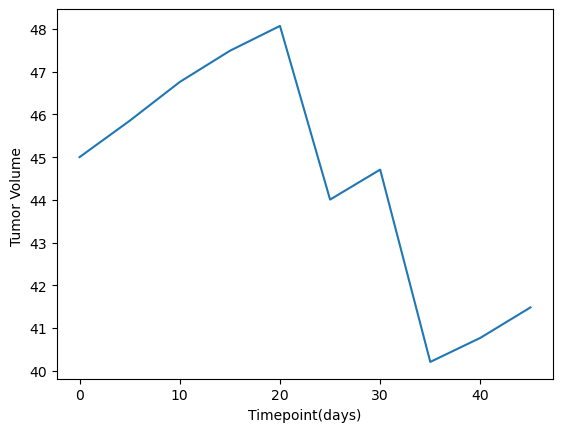

In [27]:

Capomulin_df=cleaned_df.loc[cleaned_df["Mouse ID"]=="l509",:]
Capomulin_df
plt.plot(Capomulin_df["Timepoint"],Capomulin_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume ")
plt.show()

# Capomulin_data=Capomulin.loc[(Capomulin["Drug Regimen"]=="Capomulin")]
                                                           

In [28]:
Capomulin_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume (Capomulin)')

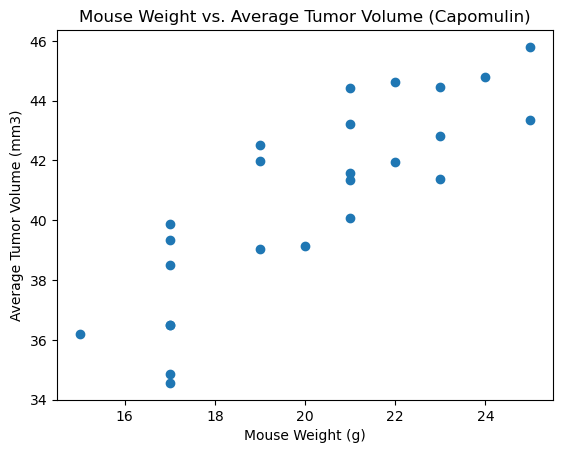

In [29]:
capomulin_data = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse in the Capomulin group
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding weight for each mouse in the Capomulin group
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create the scatter plot of mouse weight versus average tumor volume
plt.scatter(mouse_weight, average_tumor_volume, marker="o")

# Set the plot labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")


Correlation Coefficient: 0.8419363424694722


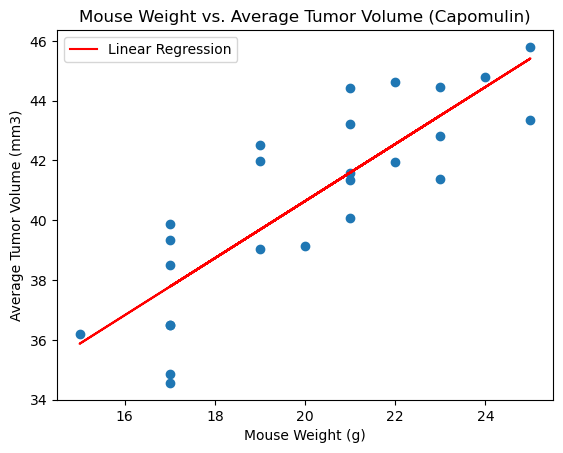

In [30]:

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(mouse_weight, average_tumor_volume)[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)
print("Correlation Coefficient:", correlation_coefficient)

plt.scatter(mouse_weight, average_tumor_volume)

# Add the linear regression line to the scatter plot
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', label='Linear Regression')

# Set the labels for x-axis and y-axis
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Set the title of the plot
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")

# Add a legend
plt.legend()
plt.show()